# Sentiment Analysis of Product Review

## Read and Explore data (EDA)

In [2]:
!pip install parsivar

     |████████████████████████████████| 36.2 MB 61 kB/s 
     |████████████████████████████████| 1.5 MB 31.6 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=4f6185077dbc6edeb2eb754aabf492db1cc9a94275836e60ba5b0d3ec3405ba4
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449919 sha256=bb97c1aa900d764098e15861f32e0c2a3ba644ee109d73ee82d8628ecd9158f9
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [18]:
import pandas as pd
import parsivar
from parsivar import Normalizer, Tokenizer, FindStems, FindChunks, DependencyParser
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AI-Internship/camera_review.txt', sep=",", header=None)
print(f'data shape : {df.shape}')
df.head()

data shape : (7023, 2)


,0,1
0,دوربین اصلی این گوشی دارای یک سنسور مگاپیکسلی ...,0
1,کارت‌های حافظه ای که معمولا بر روی گوشی‌های هو...,0
2,اندازه رزولوشن نمایشگر iPod دقیقا همانند iPhon...,0
3,اما صفحه نمایش دوربین فیلمبرداری JVC GZ-MG335،...,0
4,نهایتا، بر روی قاب پشتی گوشی نیز، دوربین به هم...,0


In [9]:
# change the header names
print(f'Initial columns name : {df.columns}')
df.columns = ['review', 'label']
print(f'Current columns name : {df.columns}')

Initial columns name : Int64Index([0, 1], dtype='int64')
Current columns name : Index(['review', 'label'], dtype='object')


In [10]:
df.head()

,review,label
0,دوربین اصلی این گوشی دارای یک سنسور مگاپیکسلی ...,0
1,کارت‌های حافظه ای که معمولا بر روی گوشی‌های هو...,0
2,اندازه رزولوشن نمایشگر iPod دقیقا همانند iPhon...,0
3,اما صفحه نمایش دوربین فیلمبرداری JVC GZ-MG335،...,0
4,نهایتا، بر روی قاب پشتی گوشی نیز، دوربین به هم...,0


Description of each columns:

*   review : people's opinion about camera.
*   label : people sentiment about that camera

** review is feature and label is target. **

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  7023 non-null   object
 1   label   7023 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.9+ KB


As we see, we don't have missing values.

In [12]:
df.describe()

,label
count,7023.000000
mean,0.655418
std,1.084845
min,-2.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [15]:
df.label.value_counts()

 1    2000
 0    2000
 2    1928
-1     937
-2     158
Name: label, dtype: int64

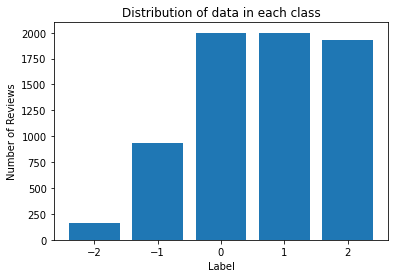

In [19]:
# destribution of data in each class
distribution  = list(df.label.value_counts())

plt.bar([1, 0, 2, -1, -2] ,distribution)
plt.xlabel("Label")
plt.ylabel("Number of Reviews")
plt.title("Distribution of data in each class")
plt.show()

As we see, number of data in class 0, 1, 2 are more than in -1, -2. 

In [20]:
df['review'][0]

'دوربین اصلی این گوشی دارای یک سنسور مگاپیکسلی می\u200cباشد که قابلیت فیلم برداری با کیفیت FullHD با سرعت 30 فریم بر ثانیه را نیز داراست.'

Let's take a look at one sample in each class.

In [21]:
# Sample -2 review
df[df['label']==-2].sample(n=1)['review'].iloc[0]

'خود شرکت ايسوس تايوان اين مسئله رو بيان کرد که به اين مشکل مي خورن ما رايگان عوض مي کنيم نزديک به 1ماه هست که گوشي در شرکت آوات هست کاري واسش نمي کنند.'

In [22]:
# Sample -1 review
df[df['label']==-1].sample(n=1)['review'].iloc[0]

'سطح امنیت تشخیص چهره به اندازه ورود با شناسه اسم رمز بالا نیست.'

In [23]:
# Sample 0 review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'نوار Notification نسبت به نسخه قبلی تغییر دیگری نداشته است.'

In [24]:
# Sample 1 review
df[df['label']==1].sample(n=1)['review'].iloc[0]

'بدست که ميگيري حس حرفه\u200cايه عکاسي بهت دست ميده مخصوصا وقتي از چشميش استفاده ميکني.'

In [25]:
# Sample 2 review
df[df['label']==2].sample(n=1)['review'].iloc[0]

'گلکسی اس3 یکی از بهترین گوشی\u200cهای موجود در بازار برای مرورگری اینترنت است.'

Let's define a function for data preprocessing.

In [ ]:
def data_preprocessing(review):
    
    # normalizing the text
    normalizer = Normalizer()
    review = normalizer.normalize(review)
    
    # word tokenization
    tokenizer = Tokenizer()
    words = tokenizer.tokenize_words(review)
    
    # stemming 
    stemmer = FindStems()
    review = [stemmer.convert_to_stem(word) for word in words]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review